In [11]:
import math
import pandas as pd
import numpy as np
np.random.seed(42)
from collections import OrderedDict

%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.size'] = 16

matplotlib.rcParams['figure.figsize'] = (30,9)

import seaborn as sns

from IPython.core.pylabtools import figsize

from scipy.stats import percentileofscore
from scipy import stats

In [12]:
def get_import_summary(str_file_path, 
                    ls_exclude_var = None):
    # Read in data
    df = pd.read_csv(str_file_path)
    # initial summary
    ls_var = []
    ls_var_type = []
    ls_dist_val = []
    ls_mean = []
    ls_std = []
    ls_min = []
    ls_25 = []
    ls_50 = []
    ls_75 = []
    ls_max = []
    ls_sample = []
    
    # selected columns
    if ls_exclude_var is None:
        ls_selected_col = [col for col in df.columns]
    else:
        ls_selected_col = [col for col in df.columns if col not in ls_exclude_var]        
    df = df[ls_selected_col]
    
    # Describe for Numerical Columns
    df_num_desc = df.describe()
    
    # Value Counts for Categorical Columns
    
    # loop through each variables
    for col in df.columns:        
        if df[col].dtype != "object":
            # get var and var type
            ls_var.append(col)
            ls_var_type.append(df[col].dtype)

            # calculate distinct value
            df_val_cnt = df[col].value_counts()
            i_dist_val = df_val_cnt.shape[0]
            ls_dist_val.append(i_dist_val)
        
            # get numerical stats
            ls_mean.append(df_num_desc.loc["mean", col])
            ls_std.append(df_num_desc.loc["std", col])
            ls_min.append(df_num_desc.loc["min", col])
            ls_25.append(df_num_desc.loc["25%", col])
            ls_50.append(df_num_desc.loc["50%", col])
            ls_75.append(df_num_desc.loc["75%", col])
            ls_max.append(df_num_desc.loc["max", col])
            
            # get sample values        
            ls_val = df_val_cnt.index.values
            i_num_sample = min([5, i_dist_val])
            str_sample = str(ls_val[0:i_num_sample])
            ls_sample.append(str_sample)
        
    df_summary = pd.DataFrame(OrderedDict((
            ("variable", pd.Series(ls_var)),
            ("variable_type", pd.Series(ls_var_type)),
            ("n_distinct_values", pd.Series(ls_dist_val)),
            ("mean", pd.Series(ls_mean)),
            ("std", pd.Series(ls_std)),
            ("min", pd.Series(ls_min)),
            ("25p", pd.Series(ls_25)),
            ("50p", pd.Series(ls_50)),
            ("75p", pd.Series(ls_75)),
            ("max", pd.Series(ls_max)),
            ("sample_values", pd.Series(ls_sample))
        ))
    )
    return df, df_summary

In [13]:
ls_exclude_var = [
    "Year",
    "MemberID", 
    "age_05", 
    "age_15",
    "age_25",
    "age_35",
    "age_45",
    "age_55",
    "age_65",
    "age_75",
    "age_85",
    "age_MISS",
    "SexMALE",
    "sexFEMALE",
    "sexMISS",
]
str_target_var = "no_Claims"

# read data params
str_file_path = "data/new_data.csv"

In [14]:
df, df_summary = get_import_summary(str_file_path, 
                                    ls_exclude_var = ls_exclude_var)

print ("Number of observations:", df.shape[0])
print ("Number of variables:", df.shape[1])
print ("Proportion of the target variable")
print (df[str_target_var].value_counts()/df.shape[0])
display(df_summary)

Number of observations: 218415
Number of variables: 101
Proportion of the target variable
1     0.084706
2     0.079582
3     0.075178
4     0.069011
5     0.061983
6     0.055990
7     0.049649
8     0.042873
9     0.039434
10    0.035222
11    0.032031
12    0.029197
13    0.025653
14    0.023515
43    0.022691
15    0.021532
16    0.019335
17    0.018117
44    0.017728
18    0.015654
19    0.014596
20    0.013877
21    0.012710
22    0.011583
23    0.010741
24    0.009693
25    0.009432
26    0.008415
27    0.008182
28    0.007293
29    0.007078
30    0.006735
32    0.006236
31    0.006121
33    0.005810
34    0.005631
35    0.005453
36    0.005178
37    0.005091
38    0.004592
39    0.004377
40    0.004299
41    0.003878
42    0.003704
0     0.000215
Name: no_Claims, dtype: float64


,variable,variable_type,n_distinct_values,mean,std,min,25p,50p,75p,max,sample_values
0,LabCount_total,float64,94,6.471827,7.734678,0.0,0.0,4.0,10.0,111.0,[0. 1. 6. 5. 4.]
1,LabCount_months,float64,13,1.655033,1.906704,0.0,0.0,1.0,2.0,12.0,[1. 0. 2. 3. 4.]
2,DrugCount_total,float64,85,10.387318,15.721582,0.0,0.0,3.0,14.0,84.0,[0. 1. 2. 3. 4.]
3,DrugCount_months,float64,13,3.746267,4.132719,0.0,0.0,2.0,7.0,12.0,[ 0. 1. 2. 11. 12.]
4,no_Claims,int64,45,12.145347,11.436686,0.0,4.0,8.0,17.0,44.0,[1 2 3 4 5]
5,no_Providers,int64,30,4.578710,3.556823,0.0,2.0,4.0,6.0,30.0,[2 1 3 4 5]
6,no_Vendors,int64,22,3.832649,2.733405,0.0,2.0,3.0,5.0,21.0,[2 1 3 4 5]
7,no_PCPs,int64,5,1.022581,0.151674,0.0,1.0,1.0,1.0,4.0,[1 2 3 0 4]
8,no_PlaceSvcs,int64,9,2.186979,1.047808,0.0,1.0,2.0,3.0,8.0,[2 1 3 4 5]
9,no_Specialities,int64,12,3.260239,1.813482,0.0,2.0,3.0,4.0,11.0,[2 1 3 4 5]


In [15]:
df.head()

,LabCount_total,LabCount_months,DrugCount_total,DrugCount_months,no_Claims,no_Providers,no_Vendors,no_PCPs,no_PlaceSvcs,no_Specialities,...,pg18,ps1,ps2,ps3,ps4,ps5,ps6,ps7,ps8,ps9
0,2.0,1.0,5.0,3.0,8,4,4,2,3,3,...,0,9,2,0,1,0,0,0,0,0
1,1.0,1.0,0.0,0.0,6,3,3,1,2,3,...,0,9,4,0,0,0,0,0,0,0
2,1.0,1.0,5.0,4.0,4,2,2,1,2,2,...,0,33,0,1,0,0,0,0,0,0
3,10.0,1.0,30.0,10.0,13,7,7,1,3,4,...,0,1,2,0,0,0,0,0,0,0
4,3.0,1.0,0.0,0.0,6,3,3,1,2,3,...,0,6,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


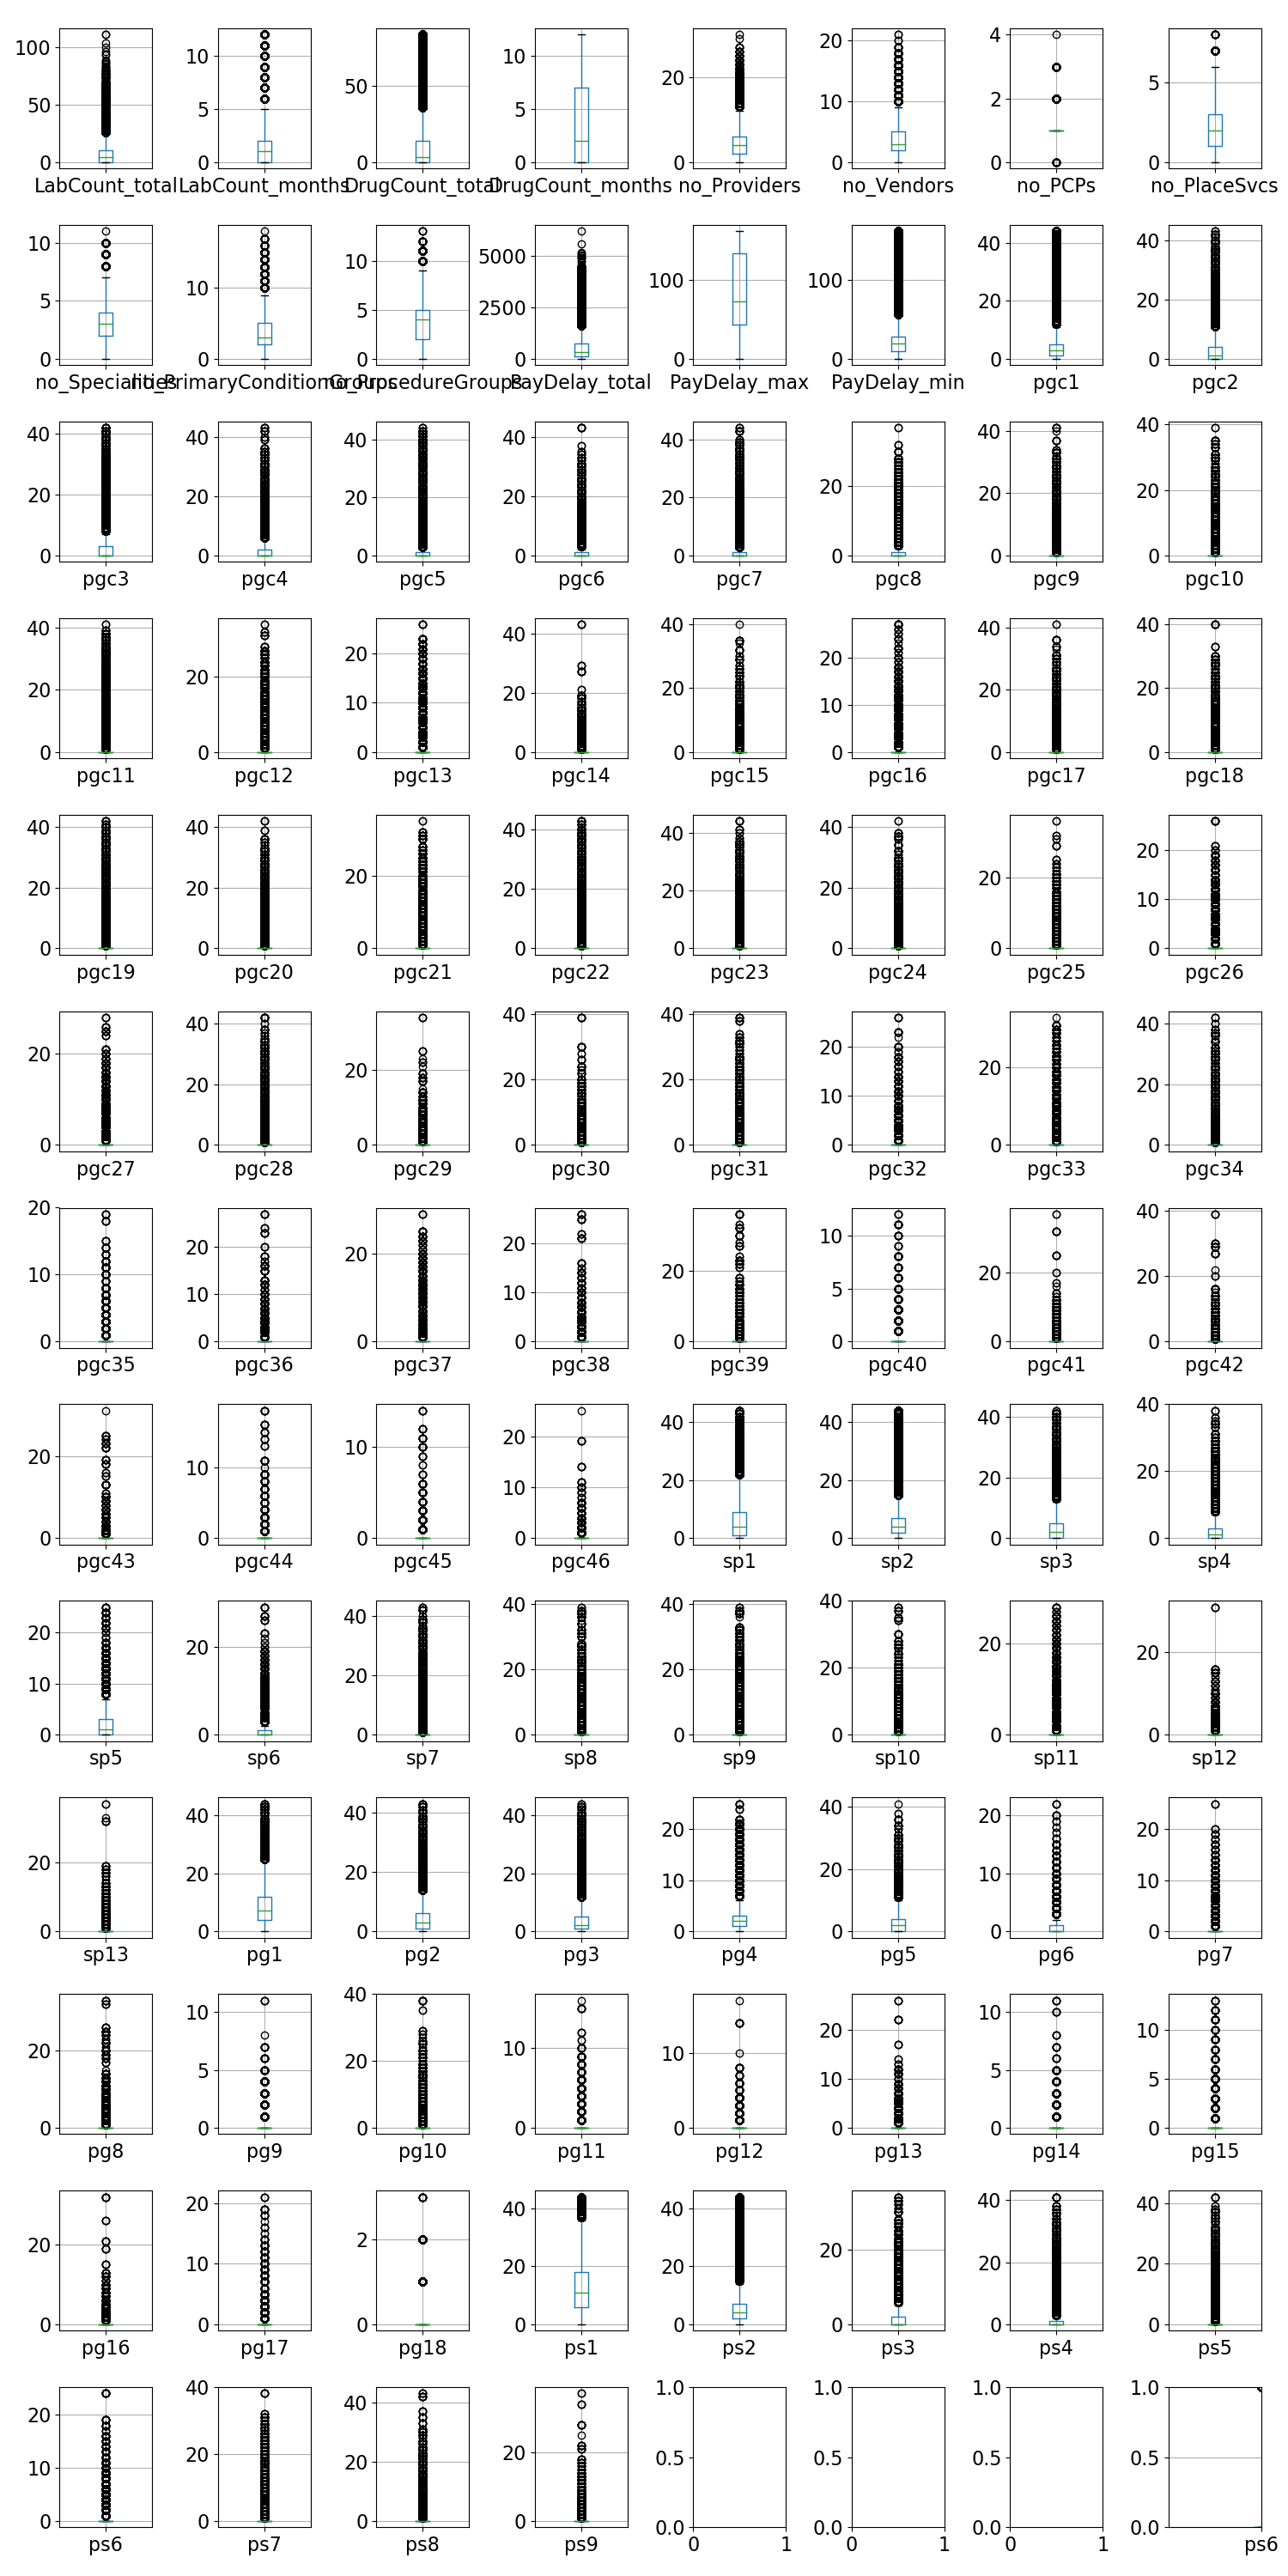

In [16]:
ls_num_data = [col for col in df.columns if df[col].dtype != "object" and col != str_target_var]
ncols = 8
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))
plt.tight_layout()

# Visualization of numerical data
for idx, var in enumerate(ls_num_data):
    i = int(idx / ncols)
    j = idx % ncols
    axes[i, j].get_xaxis().get_label().set_visible(False)
    df.boxplot(column=var, ax=axes[i, j])